In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sb
sb.set()
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('C://Users//Raj-Lenovo//Desktop//FORE//TERM-3//MLP//Coding//Real_fake_news.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,1,1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,2,2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,3,3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,4,4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [4]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
4865,2431,2431,Bill McCarthy,"""Clinton campaign official arrested by FBI on ...",Bloggers,False,FAKE,0
4866,2432,2432,Miriam Valverde,"""Our courts find that 80 percent of those who ...",Jeff Sessions,False,FAKE,0
4867,2433,2433,Kiannah Sepeda-Miller,Says a progressive income tax proposal from De...,Evelyn Sanguinetti,False,FAKE,0
4868,2434,2434,Manuela Tobias,"""Maxine Waters Is Getting Criminally Charged!""",Bloggers,False,FAKE,0
4869,2435,2435,Bill McCarthy,"""Twitter caught leaking Donald Trump’s private...",Bloggers,False,FAKE,0


In [5]:
df.shape

(4870, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       4870 non-null   int64 
 1   Unnamed: 0.1     4870 non-null   int64 
 2   author           4870 non-null   object
 3   statement        4870 non-null   object
 4   source           4870 non-null   object
 5   target           4870 non-null   bool  
 6   BinaryTarget     4870 non-null   object
 7   BinaryNumTarget  4870 non-null   int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 271.2+ KB


In [7]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,BinaryNumTarget
count,4870.000000,4870.000000,4870.000000
mean,1217.500000,1217.500000,0.500000
std,702.996251,702.996251,0.500051
min,0.000000,0.000000,0.000000
25%,609.000000,609.000000,0.000000
50%,1217.500000,1217.500000,0.500000
75%,1826.000000,1826.000000,1.000000
max,2435.000000,2435.000000,1.000000


In [8]:
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)

In [9]:
df.head()

,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [10]:
df.dropna()

,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1
...,...,...,...,...,...,...
4865,Bill McCarthy,"""Clinton campaign official arrested by FBI on ...",Bloggers,False,FAKE,0
4866,Miriam Valverde,"""Our courts find that 80 percent of those who ...",Jeff Sessions,False,FAKE,0
4867,Kiannah Sepeda-Miller,Says a progressive income tax proposal from De...,Evelyn Sanguinetti,False,FAKE,0
4868,Manuela Tobias,"""Maxine Waters Is Getting Criminally Charged!""",Bloggers,False,FAKE,0


In [11]:
df.shape

(4870, 6)

In [12]:
df[df.duplicated(keep = 'last')] 

,author,statement,source,target,BinaryTarget,BinaryNumTarget
1406,Sue Owen,Says Milken Institute rated San Antonio as nat...,Julián Castro,True,REAL,1
4249,Daniel Funke,Says a series of photos show Iranian rockets b...,Facebook posts,False,FAKE,0


In [13]:
df = df.drop_duplicates(subset = None, keep ='first')

In [14]:
df.head()

,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [15]:
num_atr=[]

cat_atr=['author' , 'statement' , 'source']

In [16]:
df.corr()

,target,BinaryNumTarget
target,1.0,1.0
BinaryNumTarget,1.0,1.0


In [17]:
df.dtypes

author             object
statement          object
source             object
target               bool
BinaryTarget       object
BinaryNumTarget     int64
dtype: object

In [21]:
# KNN Classification

In [18]:
X= df.drop(['BinaryNumTarget', 'BinaryTarget', 'target'], axis=1)
y= df['BinaryNumTarget']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [20]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

In [21]:
X_train[cat_atr].head()

,author,statement,source
2175,20,627,561
4735,171,637,617
1151,110,611,294
3873,54,2788,1123
1529,119,957,766


In [23]:
Xtr = X_train[cat_atr]
Xtr.shape 

(3407, 3)

In [24]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [26]:
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)

Xtr1 = X_test[cat_atr] 
Xtr1.shape 

(1461, 3)

In [27]:
y_pred = knn.predict(Xtr1)

In [28]:
confusion_matrix(y_test, y_pred)

array([[106, 623],
       [169, 563]], dtype=int64)

In [29]:
accuracy_score(y_test, y_pred)

0.45790554414784396

In [30]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.38545455, 0.47470489]),
 array([0.14540466, 0.76912568]),
 array([0.21115538, 0.58706986]),
 array([729, 732], dtype=int64))

In [33]:
precision_score(y_test, y_pred)

0.47470489038785835

In [34]:
recall_score(y_test, y_pred)

0.7691256830601093

In [36]:
f1_score(y_test, y_pred)

0.5870698644421272

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=20)

KNeighborsClassifier(n_neighbors=21)

KNeighborsClassifier(n_neighbors=22)

KNeighborsClassifier(n_neighbors=23)

KNeighborsClassifier(n_neighbors=24)

KNeighborsClassifier(n_neighbors=25)

KNeighborsClassifier(n_neighbors=26)

KNeighborsClassifier(n_neighbors=27)

KNeighborsClassifier(n_neighbors=28)

KNeighborsClassifier(n_neighbors=29)

KNeighborsClassifier(n_neighbors=30)

KNeighborsClassifier(n_neighbors=31)

KNeighborsClassifier(n_neighbors=32)

KNeighborsClassifier(n_neighbors=33)

KNeighborsClassifier(n_neighbors=34)

KNeighborsClassifier(n_neighbors=35)

KNeighborsClassifier(n_neighbors=36)

KNeighborsClassifier(n_neighbors=37)

KNeighborsClassifier(n_neighbors=38)

KNeighborsClassifier(n_neighbors=39)

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Error Rate vs. K Value')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Error Rate')

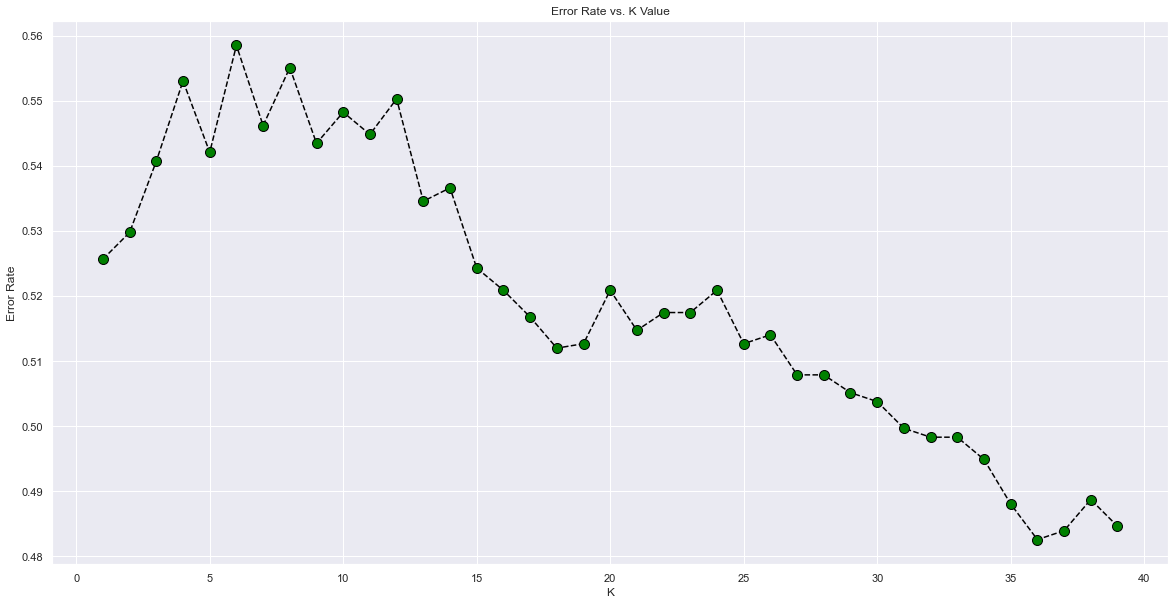

Minimum error:- 0.48254620123203285 at K = 36


In [37]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtr,y_train)
 pred_i = knn.predict(Xtr1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(20,10))
plt.plot(range(1,40),error_rate,color='black', linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [41]:
knn = KNeighborsClassifier(n_neighbors=36, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=36)

In [42]:
y_pred = knn.predict(Xtr1)

In [43]:
accuracy_score(y_test, y_pred)

0.5174537987679672

In [44]:
# Decision Tree 

In [45]:
df.columns

Index(['author', 'statement', 'source', 'target', 'BinaryTarget',
       'BinaryNumTarget'],
      dtype='object')

In [46]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [47]:
dt.fit(Xtr,y_train)

DecisionTreeClassifier()

In [48]:
y_pred = dt.predict(Xtr1)

In [49]:
np.sum((y_test == y_pred))/y_test.size

0.46406570841889117

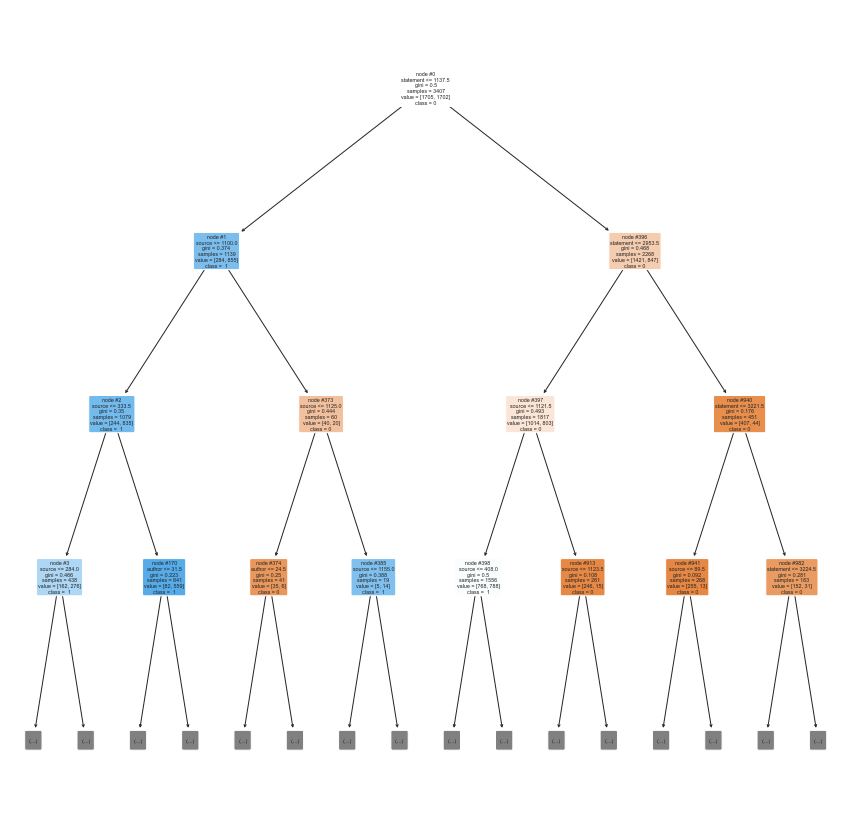

In [50]:
_=plt.figure(figsize=(15,15))
_=plot_tree(
            dt,
            max_depth = 3,  
            rounded = True, 
            filled = True,  
            impurity = True,
            node_ids = True,
            feature_names = ['author', 'statement', 'source', 'target', 'BinaryTarget',
       'BinaryNumTarget'],
            class_names = ['0',' 1']
            )

_=plt.show()

In [51]:
# Random Forest

In [52]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)

RandomForestClassifier()

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4791238877481177


In [54]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 15, 714],
       [ 47, 685]], dtype=int64)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.02      0.04       729
           1       0.49      0.94      0.64       732

    accuracy                           0.48      1461
   macro avg       0.37      0.48      0.34      1461
weighted avg       0.37      0.48      0.34      1461



In [56]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

2    0.412226
1    0.317852
0    0.269923
dtype: float64

In [59]:
list(zip(df.columns, feature_imp))

[('author', 0.41222554257298066),
 ('statement', 0.3178516954780908),
 ('source', 0.2699227619489286)]

<AxesSubplot:>

Text(0.5, 0, 'Score')

Text(0, 0.5, 'Features')

No handles with labels found to put in legend.


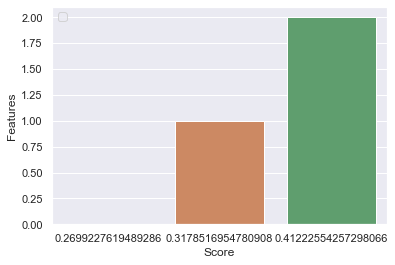

In [61]:
%matplotlib inline
sb.barplot(x=feature_imp, y=feature_imp.index)
sb.set(rc={'figure.figsize':(20,15)})
plt.xlabel('Score')
plt.ylabel('Features')
plt.legend()
plt.show()

In [63]:
lf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier()

Accuracy: 0.47707049965776865


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.03      0.05       729
           1       0.49      0.92      0.64       732

    accuracy                           0.48      1461
   macro avg       0.38      0.48      0.35      1461
weighted avg       0.38      0.48      0.35      1461

